<a href="https://colab.research.google.com/github/xuany823/Diabetes-Health-Indicator/blob/main/Diabetes_Health_Indicator_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Data

**Import Data**

In [55]:
install.packages("reticulate")
install.packages("ggplot2")
install.packages("gridExtra")
install.packages("dplyr")
install.packages("corrplot")
install.packages("reshape2")

library(ggplot2)
library(gridExtra)
library(reticulate)
library(dplyr)
library(corrplot)
library(reshape2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [4]:
db <- read.csv('/content/diabetes5050.csv')

# **Michelle**

# EDA-Data Understanding

First, Summerize data structure, variables, type,

In [5]:
dim(db)

[1] 70692    22

In [6]:
# Summary of all variables
summary(db)

 Diabetes_binary     HighBP          HighChol        CholCheck     
 Min.   :0.0     Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.5     Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   :0.5     Mean   :0.5635   Mean   :0.5257   Mean   :0.9753  
 3rd Qu.:1.0     3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0     Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      BMI            Smoker           Stroke        HeartDiseaseorAttack
 Min.   :12.00   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000      
 1st Qu.:25.00   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000      
 Median :29.00   Median :0.0000   Median :0.00000   Median :0.0000      
 Mean   :29.86   Mean   :0.4753   Mean   :0.06217   Mean   :0.1478      
 3rd Qu.:33.00   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000      
 Max.   :98.00   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000      
  PhysActivit

In [7]:
str(db)

'data.frame':	70692 obs. of  22 variables:
 $ Diabetes_binary     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HighBP              : num  1 1 0 1 0 0 0 0 0 0 ...
 $ HighChol            : num  0 1 0 1 0 0 1 0 0 0 ...
 $ CholCheck           : num  1 1 1 1 1 1 1 1 1 1 ...
 $ BMI                 : num  26 26 26 28 29 18 26 31 32 27 ...
 $ Smoker              : num  0 1 0 1 1 0 1 1 0 1 ...
 $ Stroke              : num  0 1 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: num  0 0 0 0 0 0 0 0 0 0 ...
 $ PhysActivity        : num  1 0 1 1 1 1 1 0 1 0 ...
 $ Fruits              : num  0 1 1 1 1 1 1 1 1 1 ...
 $ Veggies             : num  1 0 1 1 1 1 1 1 1 1 ...
 $ HvyAlcoholConsump   : num  0 0 0 0 0 0 1 0 0 0 ...
 $ AnyHealthcare       : num  1 1 1 1 1 0 1 1 1 1 ...
 $ NoDocbcCost         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ GenHlth             : num  3 3 1 3 2 2 1 4 3 3 ...
 $ MentHlth            : num  5 0 0 0 0 7 0 0 0 0 ...
 $ PhysHlth            : num  30 0 10 3 0 0 0 0 0 6 ...
 $ DiffWalk            : nu

Next, to table out the distribution of target variable

In [8]:
table(db$Diabetes_binary)


    0     1 
35346 35346 

In [35]:
table(db$Age)
table(db$GenHlth)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
  979  1396  2049  2793  3520  4648  6872  8603 10112 10856  8044  5394  5426 


    1     2     3     4     5 
 8282 19872 23427 13303  5808 

In [9]:
sapply(db, function(x) length(unique(x)))

Diabetes_binary               HighBP             HighChol 
                   2                    2                    2 
           CholCheck                  BMI               Smoker 
                   2                   80                    2 
              Stroke HeartDiseaseorAttack         PhysActivity 
                   2                    2                    2 
              Fruits              Veggies    HvyAlcoholConsump 
                   2                    2                    2 
       AnyHealthcare          NoDocbcCost              GenHlth 
                   2                    2                    5 
            MentHlth             PhysHlth             DiffWalk 
                  31                   31                    2 
                 Sex                  Age            Education 
                   2                   13                    6 
              Income 
                   8

Distribution of predictors

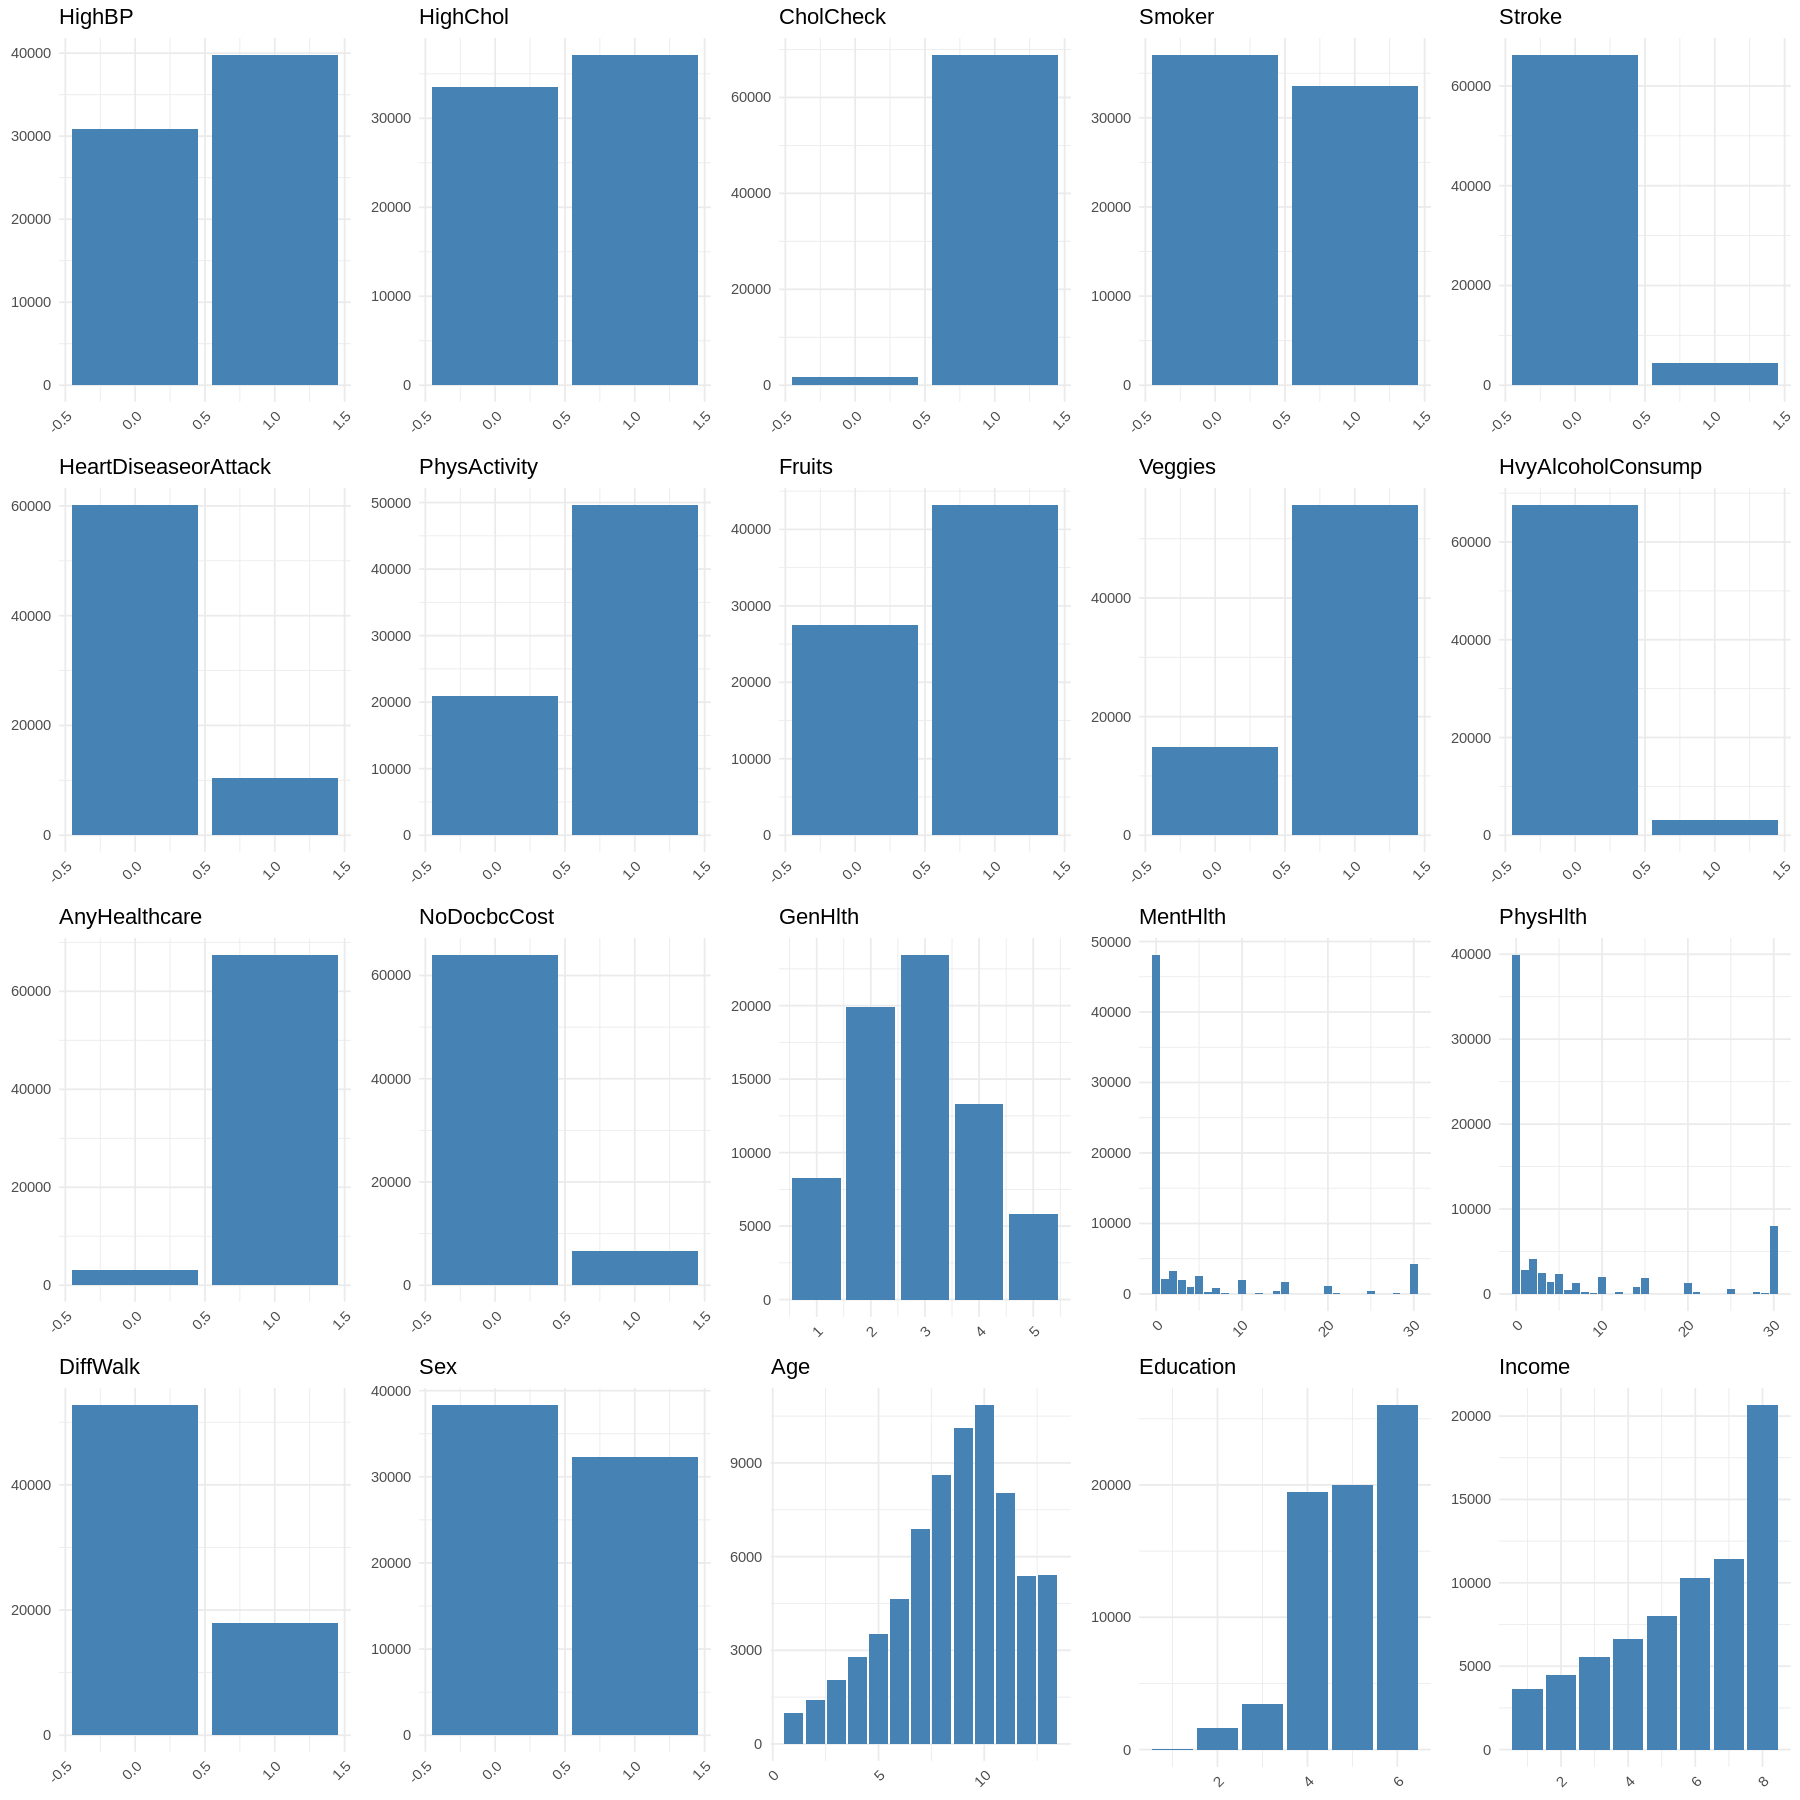

In [18]:

# exclude BMI and Diabetes_binary column
vars_to_plot <- setdiff(names(db), c("BMI", "Diabetes_binary"))

plots <- lapply(vars_to_plot, function(var) {
  ggplot(db, aes_string(x = var)) +
    geom_bar(fill = "steelblue") +
    ggtitle(var) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          axis.title.x = element_blank(),
          axis.title.y = element_blank())})

options(repr.plot.width = 15, repr.plot.height = 15)

gridExtra::grid.arrange(grobs = plots, nrow = 4, ncol =5)

Explore how age impact diabetes

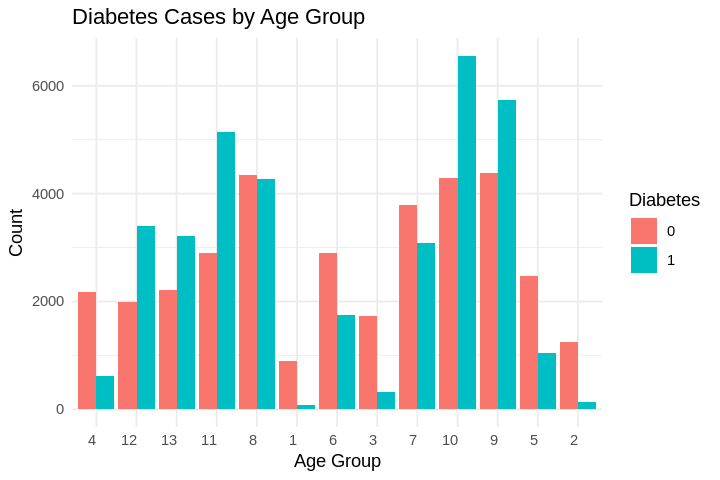

In [34]:
options(repr.plot.width = 6, repr.plot.height = 4)
#db$Diabetes_binary <- as.factor(db$Diabetes_binary)

age_levels <- unique(db$Age)
db$Age <- as.factor(db$Age)

ggplot(db, aes(x = Age, fill = Diabetes_binary)) +
  geom_bar(position = "dodge") +
  scale_x_discrete(limits = age_levels) +
  labs(title = "Diabetes Cases by Age Group",
       x = "Age Group",
       y = "Count",
       fill = "Diabetes") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 1))

Explore how Gental Heathl impact **diabetes**

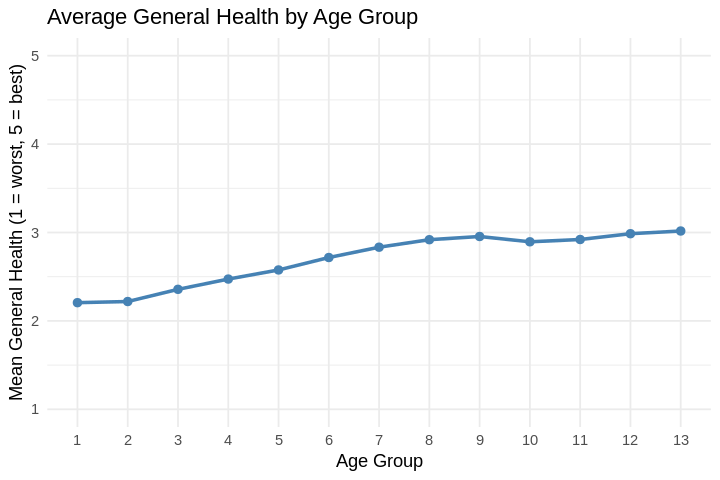

In [42]:
# average of genhlth to age
genhlth_by_age <- db %>%
  group_by(Age) %>%
  summarise(mean_genhlth = mean(GenHlth))

options(repr.plot.width = 6, repr.plot.height = 4)

ggplot(genhlth_by_age, aes(x = Age, y = mean_genhlth, group = 1)) +
  geom_line(color = "steelblue", linewidth = 1) +
  geom_point(color = "steelblue", size = 2) +
  scale_y_continuous(breaks = 1:5, limits = c(1, 5)) +
  labs(title = "Average General Health by Age Group",
       x = "Age Group",
       y = "Mean General Health (1 = worst, 5 = best)") +
  theme_minimal()

BMI Distribution by Diabetes Status

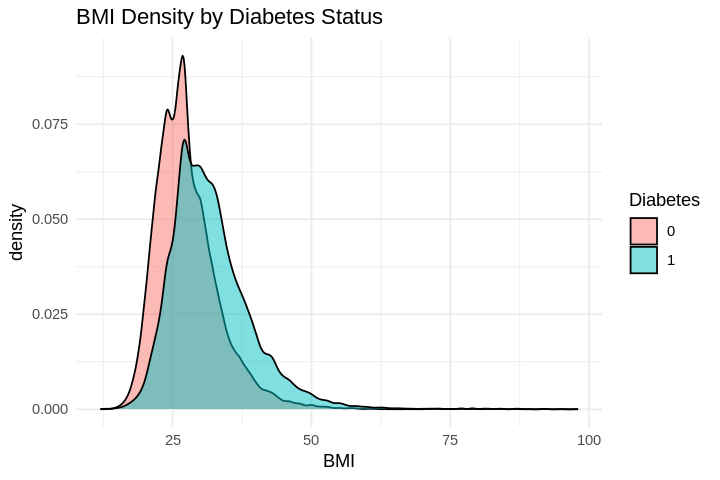

In [43]:
ggplot(db, aes(x = BMI, fill = Diabetes_binary)) +
  geom_density(alpha = 0.5) +
  labs(title = "BMI Density by Diabetes Status",
       x = "BMI",
       fill = "Diabetes") +
  theme_minimal()

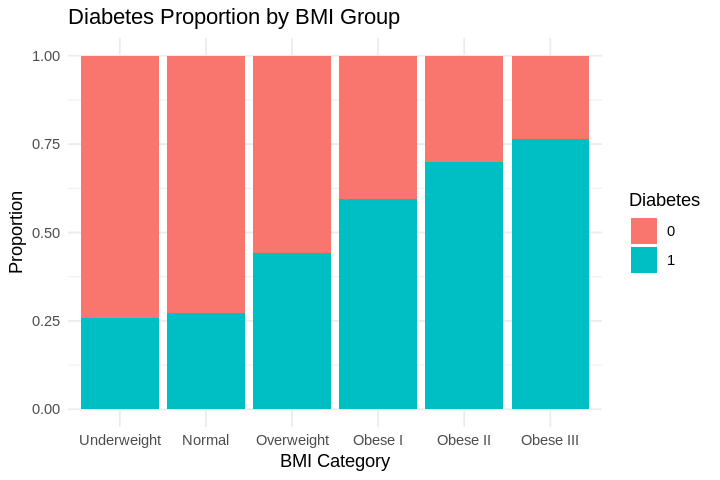

In [45]:
# 创建 BMI 分组
db$BMI_group <- cut(db$BMI,
                    breaks = c(0, 18.5, 25, 30, 35, 40, Inf),
                    labels = c("Underweight", "Normal", "Overweight", "Obese I", "Obese II", "Obese III"),
                    right = FALSE)

# 画分组柱状图
ggplot(db, aes(x = BMI_group, fill = Diabetes_binary)) +
  geom_bar(position = "fill") +
  labs(title = "Diabetes Proportion by BMI Group",
       x = "BMI Category",
       y = "Proportion",
       fill = "Diabetes") +
  theme_minimal()

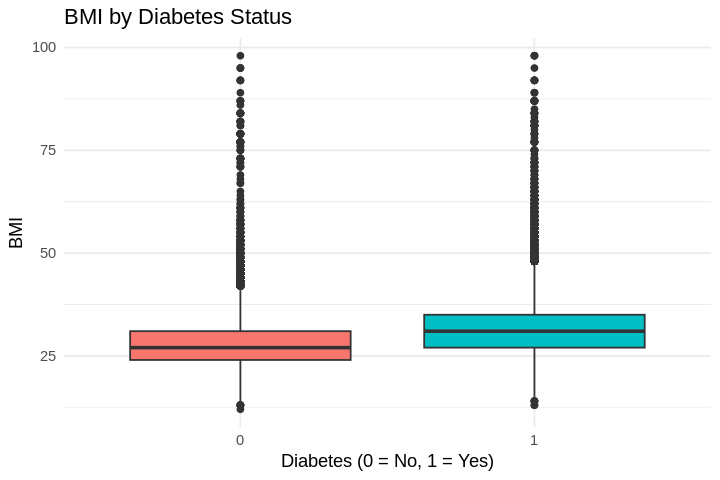

In [46]:
db$Diabetes_binary <- as.factor(db$Diabetes_binary)

ggplot(db, aes(x = Diabetes_binary, y = BMI, fill = Diabetes_binary)) +
  geom_boxplot() +
  labs(title = "BMI by Diabetes Status",
       x = "Diabetes (0 = No, 1 = Yes)",
       y = "BMI") +
  theme_minimal() +
  theme(legend.position = "none")

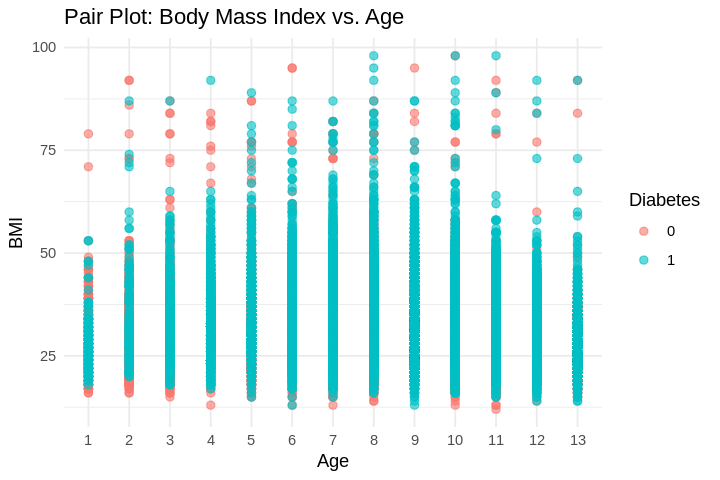

In [48]:
library(ggplot2)

# Ensure Diabetes_binary is factor (for color distinction)
db$Diabetes_binary <- as.factor(db$Diabetes_binary)

# Scatterplot (pair plot) of BMI vs Age
ggplot(db, aes(x = Age, y = BMI, color = Diabetes_binary)) +
  geom_point(alpha = 0.6, size = 2) +
  labs(title = "Pair Plot: Body Mass Index vs. Age",
       x = "Age",
       y = "BMI",
       color = "Diabetes") +
  theme_minimal()


In [49]:
# 选择数值型变量（通常 correlation 只适用于 numeric）
numeric_vars <- db[sapply(db, is.numeric)]

# 计算相关矩阵（皮尔森相关系数）
cor_matrix <- cor(numeric_vars, use = "complete.obs", method = "pearson")

# 查看矩阵
print(cor_matrix)

                          HighBP    HighChol     CholCheck          BMI
HighBP                1.00000000  0.31651485  0.1032832913  0.241018561
HighChol              0.31651485  1.00000000  0.0859813978  0.131309487
CholCheck             0.10328329  0.08598140  1.0000000000  0.045647521
BMI                   0.24101856  0.13130949  0.0456475209  1.000000000
Smoker                0.08743830  0.09339831 -0.0043305151  0.011551350
Stroke                0.12905987  0.09978619  0.0225293810  0.022930877
HeartDiseaseorAttack  0.21075039  0.18118664  0.0434971444  0.060354865
PhysActivity         -0.13610217 -0.09045316 -0.0082493633 -0.170936077
Fruits               -0.04085216 -0.04738362  0.0173838322 -0.084505333
Veggies              -0.06662374 -0.04283626  0.0003492577 -0.056527598
HvyAlcoholConsump    -0.02702989 -0.02544298 -0.0271461602 -0.058231697
AnyHealthcare         0.03576444  0.03153180  0.1068004249 -0.013417050
NoDocbcCost           0.02651701  0.03319927 -0.0626687433  0.06

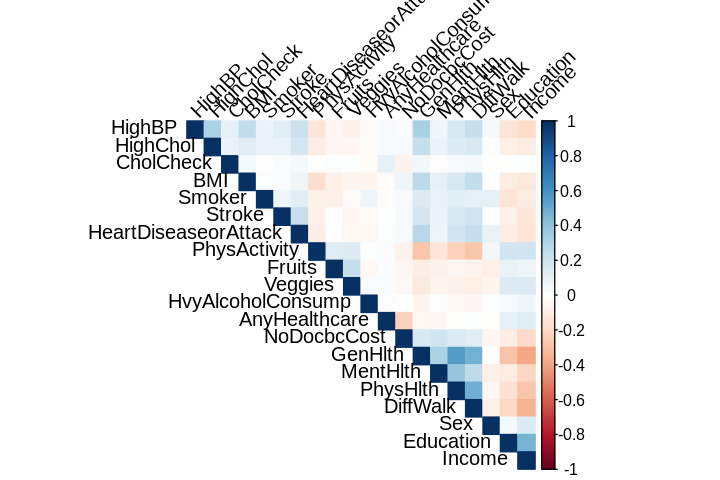

In [53]:

corrplot(cor_matrix, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45)

In [54]:
# 把矩阵转为长格式，筛选高相关对
library(reshape2)

cor_df <- melt(cor_matrix)
high_corr <- cor_df %>%
  filter(Var1 != Var2, abs(value) > 0.7)

print(high_corr)

ERROR: Error in library(reshape2): there is no package called ‘reshape2’
